In [46]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEMOVO.csv')

In [47]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,labels,speaker
0,-370.303223,58.331867,-7.632109,15.654898,3.273010,0.692397,-8.063744,5.894156,-5.199350,12.546567,...,34.036367,-0.028319,0.053574,-0.043633,-0.009186,0.019449,-0.007346,1,1,1
1,-374.553833,47.796314,1.653561,20.256063,-6.800525,0.783256,-4.250007,7.473405,-15.591282,14.261038,...,34.229551,0.023288,0.050375,-0.021473,0.040849,0.002533,0.025532,1,1,1
2,-386.473145,75.599594,-15.072874,6.823948,-1.835993,-4.165404,-10.107768,7.045069,-17.148949,11.959360,...,34.157690,0.013844,0.000709,-0.032024,-0.007825,0.018322,0.016368,1,1,1
3,-362.502167,89.977379,-15.514508,5.774208,4.361949,12.591103,-0.374380,-0.392911,-4.743288,15.702434,...,32.441757,0.002924,0.020344,-0.057423,0.041032,-0.014291,-0.002126,1,1,1
4,-412.010406,83.760246,-2.188665,18.547068,0.581788,10.956905,3.381726,3.320800,-9.278383,11.129302,...,33.286765,0.001819,0.007893,-0.003650,0.014794,0.000603,0.001663,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7,6
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7,6
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7,6
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7,6


In [48]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [49]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

19/19 [==============================] - 0s 2ms/step


In [50]:
print(gender_predictions)

[[9.98367429e-01]
 [9.99417067e-01]
 [9.99153256e-01]
 [9.97986197e-01]
 [9.92271066e-01]
 [9.98940945e-01]
 [9.96494055e-01]
 [9.98897195e-01]
 [9.95219350e-01]
 [9.96798933e-01]
 [9.99428034e-01]
 [9.99318480e-01]
 [9.93348897e-01]
 [9.99549985e-01]
 [9.99465704e-01]
 [9.99659538e-01]
 [9.99642372e-01]
 [9.99578953e-01]
 [9.99505818e-01]
 [9.99619424e-01]
 [9.99700248e-01]
 [9.99650598e-01]
 [9.99623716e-01]
 [9.98801708e-01]
 [9.99647975e-01]
 [9.99607801e-01]
 [9.99700725e-01]
 [9.99512911e-01]
 [9.99270916e-01]
 [9.99423981e-01]
 [9.99580562e-01]
 [9.99426842e-01]
 [9.95470107e-01]
 [9.99712288e-01]
 [9.99673665e-01]
 [9.99451041e-01]
 [9.99557972e-01]
 [9.99352992e-01]
 [9.99700546e-01]
 [9.99632776e-01]
 [9.99672234e-01]
 [9.99674976e-01]
 [9.99591231e-01]
 [9.99022663e-01]
 [9.99614298e-01]
 [9.99054790e-01]
 [9.98796940e-01]
 [9.99481261e-01]
 [9.99640524e-01]
 [9.99678731e-01]
 [9.99686539e-01]
 [9.99652088e-01]
 [9.99785542e-01]
 [9.99692261e-01]
 [9.99310017e-01]
 [9.995431

In [51]:
male_rows = gender_predictions.flatten() < 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} male samples.")

Filtered dataset contains 295 male samples.


In [52]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,labels,speaker
154,-244.389511,58.685631,-30.673706,32.529400,-18.990580,-15.665285,-28.910336,15.441420,-17.210575,3.697221,...,36.478688,0.019491,0.000607,0.042558,0.044154,0.029890,0.041205,1,5,2
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134,2,1,4
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057,2,1,4
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347,2,1,4
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686,2,7,6
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550,2,7,6
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411,2,7,6
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469,2,7,6


In [53]:
data.iloc[:,-3] == 1

0       True
1       True
2       True
3       True
4       True
       ...  
583    False
584    False
585    False
586    False
587    False
Name: gender, Length: 588, dtype: bool

In [54]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [55]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
154,-244.389511,58.685631,-30.673706,32.529400,-18.990580,-15.665285,-28.910336,15.441420,-17.210575,3.697221,...,20.028862,18.686883,18.504534,36.478688,0.019491,0.000607,0.042558,0.044154,0.029890,0.041205
294,-225.834305,83.962433,-5.286817,35.728619,-13.078013,17.963274,-14.742523,4.787130,-3.795607,9.062120,...,13.788023,16.202099,16.689351,33.802033,0.018696,-0.009439,-0.011013,-0.002207,0.014388,0.001134
295,-248.242477,88.256699,2.077917,48.205994,-14.475659,10.191969,-9.108829,11.997128,-4.937069,9.115414,...,14.467161,15.449994,17.459077,36.425106,-0.046464,-0.000673,-0.018350,0.024076,-0.030521,-0.010057
296,-288.580505,113.707069,-4.207919,36.642605,-7.948632,9.709131,-5.470535,5.543427,-0.030859,12.137795,...,14.419935,16.330941,18.172192,34.574195,0.012381,-0.029587,-0.049667,-0.048555,-0.004218,0.019347
297,-264.005371,79.057182,-11.777345,39.176647,-14.728073,30.268671,-1.693096,4.519373,-3.846275,14.705531,...,13.489356,16.934286,15.906022,34.959960,0.004540,0.010262,-0.001896,0.026106,-0.010619,0.014993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-428.723602,127.801125,15.011064,26.158209,-22.814543,10.531158,8.283092,-1.291359,-13.442948,11.084978,...,16.535757,15.881800,18.443654,33.880198,-0.017768,0.023105,0.130201,0.076282,-0.008200,-0.029686
584,-433.270050,98.356888,24.055376,35.478432,-30.932493,11.173256,12.042026,-1.199043,-12.588658,7.034428,...,16.113687,16.514813,18.799787,34.613071,-0.027987,-0.025462,-0.003617,0.090180,-0.020973,0.000550
585,-458.537323,104.085503,15.052121,37.028015,-10.172383,10.071804,2.412206,-3.682174,-7.252892,11.958858,...,14.285399,16.010688,18.472471,34.431134,0.087554,0.064611,0.170886,-0.068005,0.058233,-0.019411
586,-523.336914,88.056267,18.831060,43.098541,-8.197763,15.856596,4.796964,4.109037,-4.488383,12.122023,...,14.503504,15.854289,17.343597,33.439551,0.031808,-0.014211,0.000701,-0.059435,0.022520,0.021469


In [56]:
y

154    5
294    1
295    1
296    1
297    1
      ..
583    7
584    7
585    7
586    7
587    7
Name: labels, Length: 295, dtype: int64

In [57]:
X_speaker

154    2
294    4
295    4
296    4
297    4
      ..
583    6
584    6
585    6
586    6
587    6
Name: speaker, Length: 295, dtype: int64

In [58]:
X.shape, y.shape

((295, 193), (295,))

In [59]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [60]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
566,-362.677063,101.362473,-7.332106,43.959110,-3.786863,1.447497,-10.556800,4.139957,-18.686293,12.122395,...,13.813282,15.611292,20.326768,35.093518,0.001274,-0.023300,0.024508,-0.088678,-0.017585,-0.001028
448,-457.639740,52.474937,-25.618900,19.295187,-7.254351,3.097442,-13.058516,5.966221,-8.928220,6.643975,...,14.992248,15.566998,16.991700,33.171055,-0.000566,0.027927,-0.029227,0.031924,-0.015016,-0.012174
377,-364.246033,60.440960,0.676073,31.570021,-4.932997,8.759258,-3.639187,14.288801,-2.508327,4.578035,...,14.207197,15.947063,15.239278,35.009301,0.000350,0.002469,-0.027900,0.022905,0.002015,-0.002245
375,-216.430527,63.573711,-23.941694,30.773668,-12.450382,26.204388,-8.804090,5.499791,-15.230220,8.159640,...,14.213866,17.416045,16.700572,36.141429,0.005754,0.006845,-0.033733,0.077415,-0.002147,-0.010639
554,-428.586487,89.390472,-13.707393,31.899374,-7.292166,-2.322042,-3.866971,-3.918817,-17.170153,6.651804,...,16.127735,15.871560,20.139664,35.251029,-0.020610,-0.008830,-0.029350,-0.004302,-0.000408,-0.021168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,-462.598694,102.766914,16.695333,51.249252,1.639637,-1.216946,-6.574825,25.780949,-9.034945,5.579217,...,16.455974,16.443288,17.386726,33.832749,-0.008741,0.002344,-0.071169,-0.096755,-0.016976,0.009550
364,-244.971634,51.911121,-10.242311,27.399107,-3.873884,21.913593,-13.942616,-2.120807,-16.105997,8.285926,...,15.201773,16.631891,16.384723,36.355822,0.011565,-0.043370,0.027536,-0.051646,-0.017492,-0.021516
399,-458.004730,86.442383,2.414911,43.202599,11.228717,19.964369,-7.935510,9.776399,-5.273984,8.478053,...,14.863319,16.689771,17.068862,33.395290,0.011505,0.001238,0.022915,-0.002022,0.008437,0.005603
563,-345.265198,83.985146,-24.794455,14.430529,0.151799,6.807520,-20.926929,7.834123,-20.980289,12.764962,...,14.691452,16.926338,18.170611,34.846445,0.001674,0.005635,-0.017758,0.005345,0.007332,-0.011184


In [61]:
X_speaker

566    6
448    5
377    4
375    4
554    6
      ..
481    5
364    4
399    5
563    6
395    5
Name: speaker, Length: 295, dtype: int64

In [62]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [63]:
y1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
X.shape, y1.shape

((295, 193), (295, 7))

In [65]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [66]:
X2.shape, X2_speaker.shape, y2.shape

((295, 193), (295,), (295,))

In [67]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [68]:
import random, numpy as np
from keras import optimizers
kfold=3
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [69]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-362.677063,101.362473,-7.332106,43.959110,-3.786863,1.447497,-10.556800,4.139957,-18.686293,12.122395,...,13.813282,15.611292,20.326768,35.093518,0.001274,-0.023300,0.024508,-0.088678,-0.017585,-0.001028
1,-457.639740,52.474937,-25.618900,19.295187,-7.254351,3.097442,-13.058516,5.966221,-8.928220,6.643975,...,14.992248,15.566998,16.991700,33.171055,-0.000566,0.027927,-0.029227,0.031924,-0.015016,-0.012174
2,-364.246033,60.440960,0.676073,31.570021,-4.932997,8.759258,-3.639187,14.288801,-2.508327,4.578035,...,14.207197,15.947063,15.239278,35.009301,0.000350,0.002469,-0.027900,0.022905,0.002015,-0.002245
3,-216.430527,63.573711,-23.941694,30.773668,-12.450382,26.204388,-8.804090,5.499791,-15.230220,8.159640,...,14.213866,17.416045,16.700572,36.141429,0.005754,0.006845,-0.033733,0.077415,-0.002147,-0.010639
4,-428.586487,89.390472,-13.707393,31.899374,-7.292166,-2.322042,-3.866971,-3.918817,-17.170153,6.651804,...,16.127735,15.871560,20.139664,35.251029,-0.020610,-0.008830,-0.029350,-0.004302,-0.000408,-0.021168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,-462.598694,102.766914,16.695333,51.249252,1.639637,-1.216946,-6.574825,25.780949,-9.034945,5.579217,...,16.455974,16.443288,17.386726,33.832749,-0.008741,0.002344,-0.071169,-0.096755,-0.016976,0.009550
291,-244.971634,51.911121,-10.242311,27.399107,-3.873884,21.913593,-13.942616,-2.120807,-16.105997,8.285926,...,15.201773,16.631891,16.384723,36.355822,0.011565,-0.043370,0.027536,-0.051646,-0.017492,-0.021516
292,-458.004730,86.442383,2.414911,43.202599,11.228717,19.964369,-7.935510,9.776399,-5.273984,8.478053,...,14.863319,16.689771,17.068862,33.395290,0.011505,0.001238,0.022915,-0.002022,0.008437,0.005603
293,-345.265198,83.985146,-24.794455,14.430529,0.151799,6.807520,-20.926929,7.834123,-20.980289,12.764962,...,14.691452,16.926338,18.170611,34.846445,0.001674,0.005635,-0.017758,0.005345,0.007332,-0.011184


In [70]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,6
1,5
2,4
3,4
4,6
...,...
290,5
291,4
292,5
293,6


In [71]:
speakers = X_speaker.unique()
speakers

array([6, 5, 4, 2], dtype=int64)

In [72]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,6
1,5
2,4
3,4
4,6
...,...
290,5
291,4
292,5
293,6


In [73]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-362.677063,101.362473,-7.332106,43.959110,-3.786863,1.447497,-10.556800,4.139957,-18.686293,12.122395,...,15.611292,20.326768,35.093518,0.001274,-0.023300,0.024508,-0.088678,-0.017585,-0.001028,6
1,-457.639740,52.474937,-25.618900,19.295187,-7.254351,3.097442,-13.058516,5.966221,-8.928220,6.643975,...,15.566998,16.991700,33.171055,-0.000566,0.027927,-0.029227,0.031924,-0.015016,-0.012174,5
2,-364.246033,60.440960,0.676073,31.570021,-4.932997,8.759258,-3.639187,14.288801,-2.508327,4.578035,...,15.947063,15.239278,35.009301,0.000350,0.002469,-0.027900,0.022905,0.002015,-0.002245,4
3,-216.430527,63.573711,-23.941694,30.773668,-12.450382,26.204388,-8.804090,5.499791,-15.230220,8.159640,...,17.416045,16.700572,36.141429,0.005754,0.006845,-0.033733,0.077415,-0.002147,-0.010639,4
4,-428.586487,89.390472,-13.707393,31.899374,-7.292166,-2.322042,-3.866971,-3.918817,-17.170153,6.651804,...,15.871560,20.139664,35.251029,-0.020610,-0.008830,-0.029350,-0.004302,-0.000408,-0.021168,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,-462.598694,102.766914,16.695333,51.249252,1.639637,-1.216946,-6.574825,25.780949,-9.034945,5.579217,...,16.443288,17.386726,33.832749,-0.008741,0.002344,-0.071169,-0.096755,-0.016976,0.009550,5
291,-244.971634,51.911121,-10.242311,27.399107,-3.873884,21.913593,-13.942616,-2.120807,-16.105997,8.285926,...,16.631891,16.384723,36.355822,0.011565,-0.043370,0.027536,-0.051646,-0.017492,-0.021516,4
292,-458.004730,86.442383,2.414911,43.202599,11.228717,19.964369,-7.935510,9.776399,-5.273984,8.478053,...,16.689771,17.068862,33.395290,0.011505,0.001238,0.022915,-0.002022,0.008437,0.005603,5
293,-345.265198,83.985146,-24.794455,14.430529,0.151799,6.807520,-20.926929,7.834123,-20.980289,12.764962,...,16.926338,18.170611,34.846445,0.001674,0.005635,-0.017758,0.005345,0.007332,-0.011184,6


In [74]:
# Get top 5 speakers with the most data

speaker_counts = X_combined['speaker'].value_counts()
selected_speakers = speaker_counts.head(3).index.to_numpy()

print("Selected speakers:", selected_speakers)

Selected speakers: [6 5 4]


In [85]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=294
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='EMOVO_speaker_male'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(selected_speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 6
Train speakers: [4 5]
No overlap in fold 0.
Selected FS indices: [ 45  94   0  42   9  30   2  57  47 109  80 105  37  13  38  44 167 155
  76 185  26  27  69  87  31 124 160 117 188 141 142 171 100 151  33 112
  40 101  78  70 132 107  83  92 182  49  28  91 187 190 143 116  20  61
  79  71 138  93  90  73 118  99 115 157 177 135  88 130 125 121 129 150
 184 179 139 122  72  36  21   8  25  29   4   1   3   7  24  58 178 108
 133  86  84  77 127 145  64  56  62  39  97  43  60  32  98 104 114  75
  82  50  48 120  89  63  53  66 113 128 123  74  96  85  65  17  19]
0
Epoch 1/700
7/7 [==============================] - 2s 130ms/step - loss: 2.1260 - accuracy: 0.1990 - val_loss: 2.4000 - val_accuracy: 0.1429
Epoch 2/700
7/7 [==============================] - 1s 109ms/step - loss: 1.8151 - accuracy: 0.2806 - val_loss: 2.2526 - val_accuracy: 0.1429
Epoch 3/700
7/7 [==============================] - 1s 96ms/step - loss: 1.6993 - accuracy: 0.3214 - val_loss: 2.1477 - v

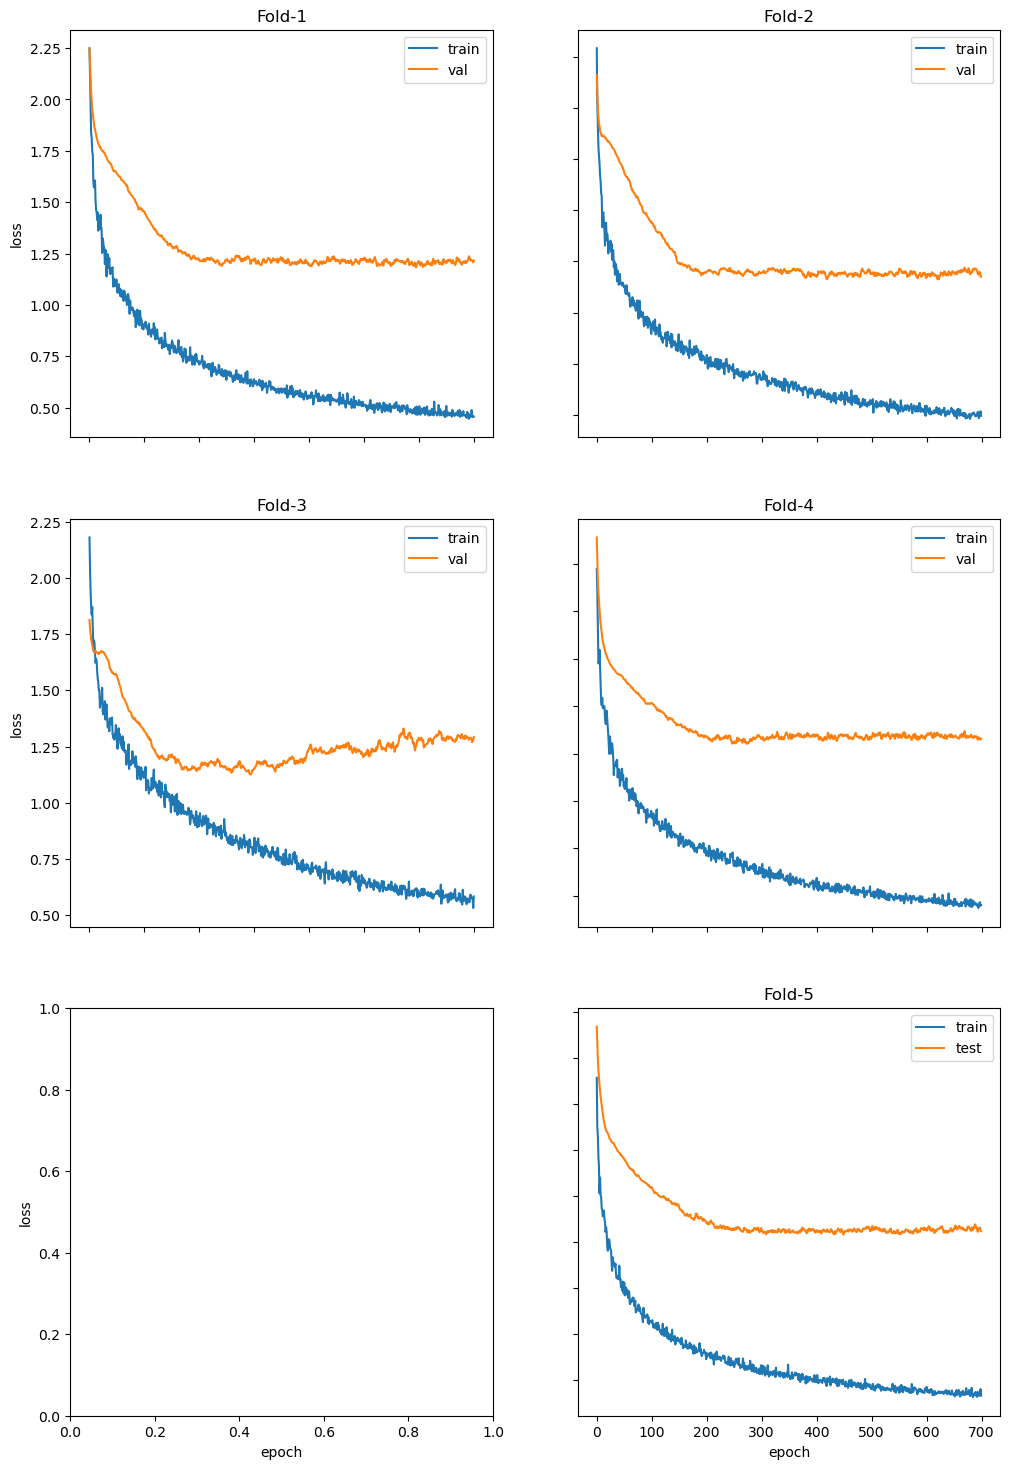

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [92]:
# loading json and creating model
from keras.models import model_from_json
savedir='EMOVO_speaker_male'
m='Model_1'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [93]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00005, decay=1e-6)

Xloaded=np.load(savedir+'/X1.npy')
yloaded=np.load(savedir+'/y1.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 35.71%


In [94]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

4/4 [==============================] - 0s 18ms/step
(98, 7)
98


array([[ 8,  0,  5,  1,  0,  0,  0],
       [ 1,  0,  1,  8,  0,  3,  1],
       [ 5,  0,  3,  0,  0,  0,  6],
       [ 3,  0,  0,  2,  0,  9,  0],
       [ 0,  0,  0,  2, 12,  0,  0],
       [ 3,  0,  0,  9,  0,  2,  0],
       [ 0,  0,  5,  1,  0,  0,  8]], dtype=int64)

In [95]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[57.1  0.  35.7  7.1  0.   0.   0. ]
 [ 7.1  0.   7.1 57.1  0.  21.4  7.1]
 [35.7  0.  21.4  0.   0.   0.  42.9]
 [21.4  0.   0.  14.3  0.  64.3  0. ]
 [ 0.   0.   0.  14.3 85.7  0.   0. ]
 [21.4  0.   0.  64.3  0.  14.3  0. ]
 [ 0.   0.  35.7  7.1  0.   0.  57.1]]


      dis  gio   neu   pau   rab   sor   tri
dis  57.1  0.0  35.7   7.1   0.0   0.0   0.0
gio   7.1  0.0   7.1  57.1   0.0  21.4   7.1
neu  35.7  0.0  21.4   0.0   0.0   0.0  42.9
pau  21.4  0.0   0.0  14.3   0.0  64.3   0.0
rab   0.0  0.0   0.0  14.3  85.7   0.0   0.0
sor  21.4  0.0   0.0  64.3   0.0  14.3   0.0
tri   0.0  0.0  35.7   7.1   0.0   0.0  57.1



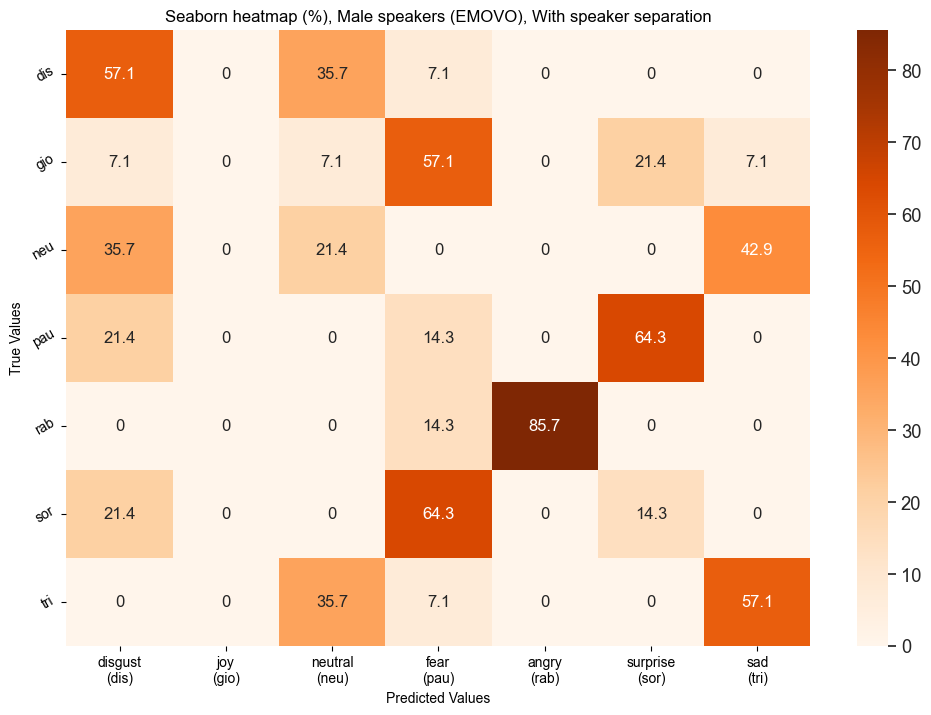

In [96]:
listik = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Male speakers (EMOVO), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_xticklabels(['disgust\n(dis)', 'joy\n(gio)', 'neutral\n(neu)','fear\n(pau)', 'angry\n(rab)', 'surprise\n(sor)', 'sad\n(tri)'])
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()